<a href="https://colab.research.google.com/github/Anlu-Chen/TFG/blob/main/Derivada_topologica_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#modificar esto al lugar donde se tenga la base de datos
train_experiments=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/train_experiments_derivada_topologica.csv', delimiter=';')
train_solutions=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/train_solutions_derivada_topologica.csv',delimiter=';')
test_experiments=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/test_experiments_derivada_topologica.csv',delimiter=';')
test_solutions=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/test_solutions_derivada_topologica.csv',delimiter=';')
validation_experiments=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/validation_experiments_derivada_topologica.csv',delimiter=';')
validation_solutions=np.loadtxt('/content/drive/MyDrive/Base de datos derivada topologica/validation_solutions_derivada_topologica.csv',delimiter=';')

In [3]:
print("Número de experimentos del set de entrenamiento: ",len(train_experiments))
print("Número de experimentos del test set: ",len(test_experiments))
print("Número de experimentos reservados para validación: ",len(validation_experiments))

train_experiments=np.reshape(train_experiments,(train_experiments.shape[0],10,10,1))
test_experiments=np.reshape(test_experiments,(test_experiments.shape[0],10,10,1))
validation_experiments=np.reshape(validation_experiments,(validation_experiments.shape[0],10,10,1))

Número de experimentos del set de entrenamiento:  3000
Número de experimentos del test set:  1500
Número de experimentos reservados para validación:  500



Epoch 00001: LearningRateScheduler reducing learning rate to 0.4.
Epoch 1/10
150/150 - 1s - loss: 0.0047 - mae: 0.0498 - val_loss: 0.0306 - val_mae: 0.1421

Epoch 00002: LearningRateScheduler reducing learning rate to 0.2963272882726872.
Epoch 2/10
150/150 - 1s - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0340 - val_mae: 0.1567

Epoch 00003: LearningRateScheduler reducing learning rate to 0.21952465443761057.
Epoch 3/10
150/150 - 1s - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0140 - val_mae: 0.1070

Epoch 00004: LearningRateScheduler reducing learning rate to 0.16262786389623968.
Epoch 4/10
150/150 - 1s - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0010 - val_mae: 0.0255

Epoch 00005: LearningRateScheduler reducing learning rate to 0.12047768476488085.
Epoch 5/10
150/150 - 1s - loss: 0.0017 - mae: 0.0312 - val_loss: 6.7890e-04 - val_mae: 0.0202

Epoch 00006: LearningRateScheduler reducing learning rate to 0.08925206405937193.
Epoch 6/10
150/150 - 1s - loss: 0.0021 - mae: 0.0346 - val_loss: 

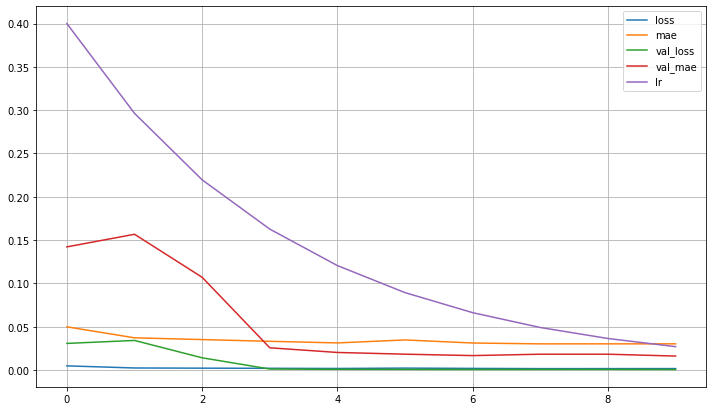

In [4]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same',input_shape=train_experiments[0].shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(2048,kernel_initializer='random_normal',bias_initializer='zeros', use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1024, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(512, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(256, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(64, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(32, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True)]) 

from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Compilar el modelo
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mae']) 

# Definimos como va a ser el ratio de aprendizaje exponencial.
initial_learning_rate = 0.4
def lr_exp_decay(epoch, lr):
    k = 0.3
    return initial_learning_rate * math.exp(-k*epoch)

# Ajustamos el modelo.
training_history = model.fit(
        train_experiments, 
        train_solutions, 
        batch_size=20, 
        epochs=10,
        verbose=2,
        validation_data=(test_experiments, test_solutions),
        callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)]
        )

############################################################################
# Pintamos el modelo
model.summary() 
pd.DataFrame(training_history.history).plot(figsize=(12,7))
plt.grid(True)
plt.show()

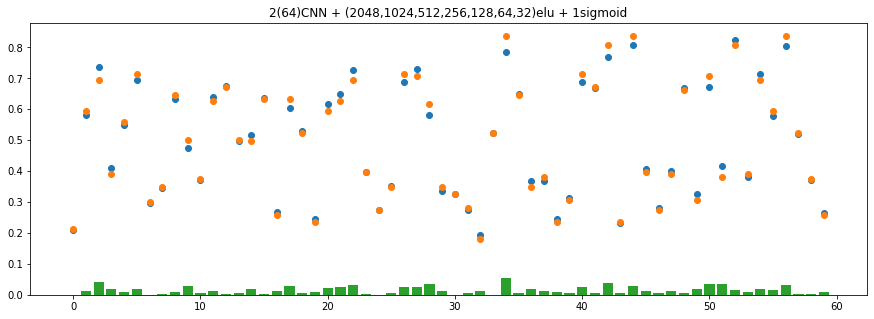

In [5]:
# Comparamos las predicciones con las originales
predictions = model.predict(validation_experiments)
x=np.zeros(60)
y=np.zeros(60)
z=np.zeros(60)
for i in range (0,60):
  x[i]=i
for i in range (0,60):
  y[i]=predictions[i*2] #cogemos cada 2 predicciones
for i in range (0,60):
  z[i]=validation_solutions[i*2]
fig, ax = plt.subplots(figsize = (15, 5))
plt.title("2(64)CNN + (2048,1024,512,256,128,64,32)elu + 1sigmoid")
plt.scatter(x,y)
plt.scatter(x,z)
plt.bar(x,abs(y-z))
plt.show()